In [1]:
import json
import pandas as pd
import seaborn as sns

file='results_small/l2l_long.json'
sns.set_theme(style="ticks", palette="pastel")

print("Using File:" + file.split('/')[1].split('.')[0])
f=open(file)
data=json.load(f)
data=data[0] 
sdf=pd.DataFrame(data['sender']['points'][0])
keys=list(data['receivers'].keys())
key=''
if len(keys) == 1: 
    key=keys[0]
    
rdf=pd.DataFrame(data['receivers'][key]['points'][0])
difdf=pd.DataFrame()
difdf['dt_timestamp']=rdf['timestamp']-sdf['timestamp']
difdf['dt_timestamp_ms']=difdf['dt_timestamp']/1000/1000
difdf['dt_value']=rdf['value']-sdf['value']
difdf['dt_sample']=rdf['sample']-sdf['sample']
difdf['value']=sdf['value']
difdf['sample']=sdf['sample']
difdf['dt_timestamp_ms']=difdf['dt_timestamp']/1000/1000
difdf['index'] = difdf.index
difdf['testcase'] = file.split('/')[1].split('.')[0]


difdf.head()

Using File:l2l_long


dt_timestamp  dt_timestamp_ms  dt_value  dt_sample  value  sample  index  \
0      14777000          14.7770         0          1      2   10000      0   
1      14773300          14.7733         0          1      1   20000      1   
2      14769100          14.7691         0          1      2   30000      2   
3      16074400          16.0744         0          1      1   40000      3   
4      14674300          14.6743         0          1      2   50000      4   

   testcase  
0  l2l_long  
1  l2l_long  
2  l2l_long  
3  l2l_long  
4  l2l_long

In [2]:
print(difdf['dt_timestamp_ms'].median())
difdf.describe()

14.675


dt_timestamp  dt_timestamp_ms  dt_value  dt_sample       value  \
count  9.990000e+02       999.000000     999.0      999.0  999.000000   
mean   1.499634e+07        14.996342       0.0        1.0    1.500501   
std    5.858500e+05         0.585850       0.0        0.0    0.500250   
min    1.436870e+07        14.368700       0.0        1.0    1.000000   
25%    1.458035e+07        14.580350       0.0        1.0    1.000000   
50%    1.467500e+07        14.675000       0.0        1.0    2.000000   
75%    1.487900e+07        14.879000       0.0        1.0    2.000000   
max    1.618000e+07        16.180000       0.0        1.0    2.000000   

             sample       index  
count  9.990000e+02  999.000000  
mean   5.000000e+06  499.000000  
std    2.885308e+06  288.530761  
min    1.000000e+04    0.000000  
25%    2.505000e+06  249.500000  
50%    5.000000e+06  499.000000  
75%    7.495000e+06  748.500000  
max    9.990000e+06  998.000000

[Text(0.5, 0, 'ipmedia-4'), Text(0, 0.5, 'Latency [ms]')]

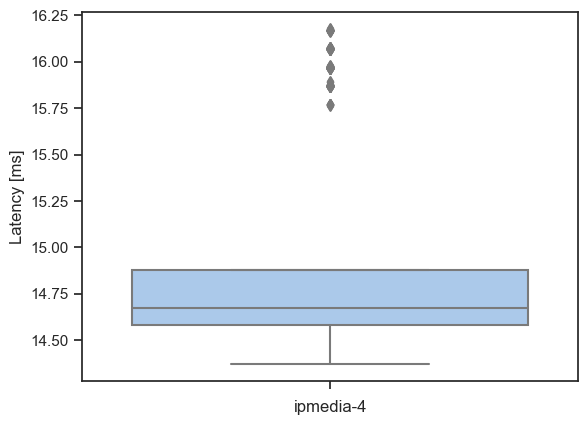

In [3]:
ax=sns.boxplot(y=difdf['dt_timestamp_ms'])
ax.set(xlabel='ipmedia-4', ylabel='Latency [ms]')

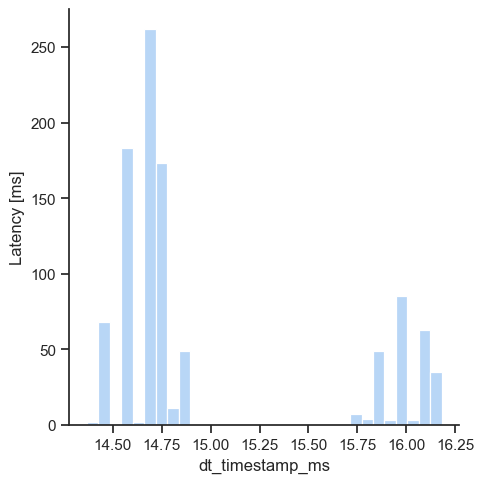

In [4]:
ax=sns.displot(difdf, x="dt_timestamp_ms")
ax.set(ylabel='Latency [ms]')

[Text(0.5, 0, 'Value'), Text(0, 0.5, 'Latency [ms]')]

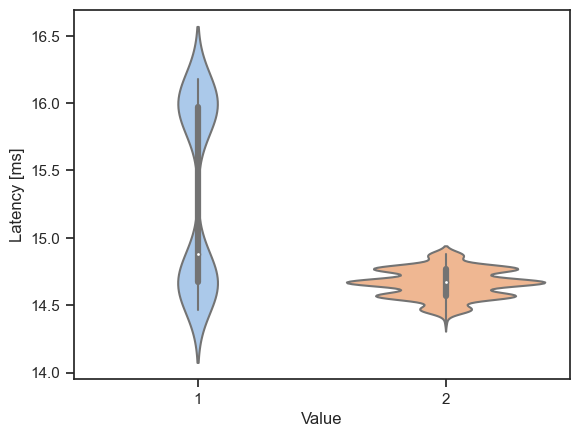

In [5]:
ax=sns.violinplot(x=difdf['value'], y=difdf['dt_timestamp_ms'])
ax.set(xlabel='Value', ylabel='Latency [ms]')

In [6]:
# Part Wide
file='results_small/l2l_wide.json'
#file='results_big_new/2to4wide.json'
print("Using File:" + file)
output=file.replace('.json','.csv')
f=open(file)
data=json.load(f)

receiverid=list(data[0]['receivers'].keys())[0]
sdf=pd.DataFrame()
rdf=pd.DataFrame()
for i in range(0,len(data)):
    sdfi=pd.DataFrame(data[i]['sender']['points'][0])
    sdfi['run']=i+1
    rdfi=pd.DataFrame(data[i]['receivers'][receiverid]['points'][0])
    rdfi['run']=i+1
    sdf=pd.concat([sdf,sdfi])
    rdf=pd.concat([rdf,rdfi])
    
difdf=pd.DataFrame()
difdf['run']=sdf['run']
difdf['dt_timestamp']=rdf['timestamp']-sdf['timestamp']
difdf['dt_timestamp_ms']=difdf['dt_timestamp']/1000/1000
difdf['dt_value']=rdf['value']-sdf['value']
difdf['value']=sdf['value']
difdf['sample']=sdf['sample']
difdf['index'] = difdf.index

difdf.describe()

Using File:results_small/l2l_wide.json


run  dt_timestamp  dt_timestamp_ms  dt_value        value  \
count  1980.000000  1.980000e+03      1980.000000    1980.0  1980.000000   
mean     10.500000  1.252609e+07        12.526091       0.0     1.505051   
std       5.767738  2.217917e+07        22.179168       0.0     0.500101   
min       1.000000 -2.161313e+08      -216.131300       0.0     1.000000   
25%       5.750000  1.456758e+07        14.567575       0.0     1.000000   
50%      10.500000  1.466900e+07        14.669000       0.0     2.000000   
75%      15.250000  1.477300e+07        14.773000       0.0     2.000000   
max      20.000000  1.618150e+07        16.181500       0.0     2.000000   

              sample      index  
count    1980.000000  1980.0000  
mean   500000.000000    49.0000  
std    285845.995773    28.5846  
min     10000.000000     0.0000  
25%    250000.000000    24.0000  
50%    500000.000000    49.0000  
75%    750000.000000    74.0000  
max    990000.000000    98.0000

C:\Users\xelon\AppData\Local\Temp\ipykernel_12628\1461815640.py:2: UserWarning: 
The palette list has fewer values (6) than needed (20) and will cycle, which may produce an uninterpretable plot.
  ax=sns.lineplot(x='index', y='dt_timestamp_ms', data=difdf,


[Text(0.5, 0, 'Index'), Text(0, 0.5, 'Latency [ms]')]

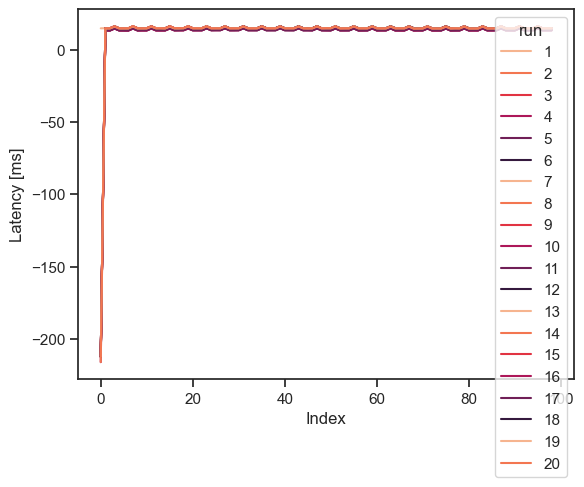

In [7]:
palette = sns.color_palette("rocket_r")
ax=sns.lineplot(x='index', y='dt_timestamp_ms', data=difdf, 
                  hue="run",  size_order=["T1", "T2"]
                  , palette=palette,
                 )
ax.set(xlabel='Index', ylabel='Latency [ms]')

In [8]:
ltdf=difdf[difdf['dt_timestamp_ms'] > 0]

C:\Users\xelon\AppData\Local\Temp\ipykernel_12628\1024435041.py:1: UserWarning: 
The palette list has fewer values (6) than needed (20) and will cycle, which may produce an uninterpretable plot.
  ax=sns.lineplot(x='index', y='dt_timestamp_ms', data=ltdf,


[Text(0.5, 0, 'Index'), Text(0, 0.5, 'Latency [ms]')]

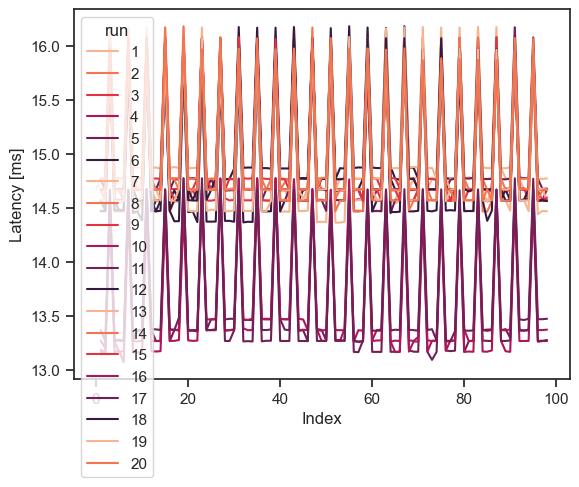

In [9]:
ax=sns.lineplot(x='index', y='dt_timestamp_ms', data=ltdf, 
                  hue="run",  size_order=["T1", "T2"]
                  , palette=palette,
                 )
ax.set(xlabel='Index', ylabel='Latency [ms]')

[Text(0.5, 0, 'Run'), Text(0, 0.5, 'Latency [ms]')]

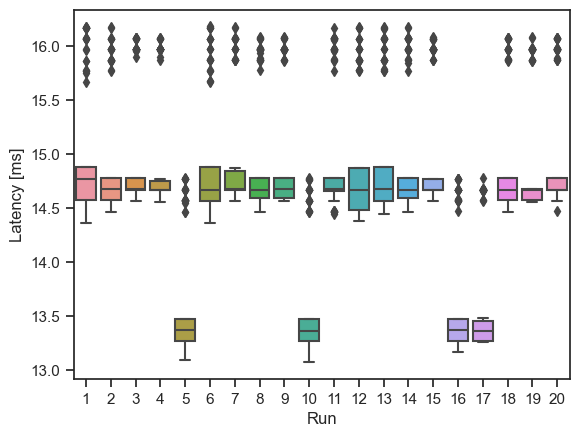

In [10]:
ax=sns.boxplot(y=ltdf['dt_timestamp_ms'],x=ltdf['run'])
ax.set(xlabel='Run', ylabel='Latency [ms]')

In [11]:
ltdf.describe()

run  dt_timestamp  dt_timestamp_ms  dt_value        value  \
count  1961.000000  1.961000e+03      1961.000000    1961.0  1961.000000   
mean     10.495156  1.470729e+07        14.707289       0.0     1.500255   
std       5.770271  7.887216e+05         0.788722       0.0     0.500127   
min       1.000000  1.307330e+07        13.073300       0.0     1.000000   
25%       5.000000  1.456800e+07        14.568000       0.0     1.000000   
50%      10.000000  1.466910e+07        14.669100       0.0     2.000000   
75%      15.000000  1.477330e+07        14.773300       0.0     2.000000   
max      20.000000  1.618150e+07        16.181500       0.0     2.000000   

              sample        index  
count    1961.000000  1961.000000  
mean   504747.577766    49.474758  
std    283107.663276    28.310766  
min     10000.000000     0.000000  
25%    260000.000000    25.000000  
50%    500000.000000    49.000000  
75%    750000.000000    74.000000  
max    990000.000000    98.000000

[Text(0.5, 0, 'Value'), Text(0, 0.5, 'Latency [ms]')]

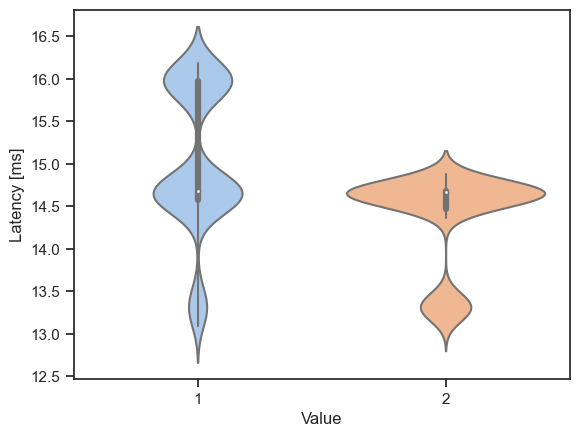

In [12]:
ax=sns.violinplot(x=ltdf['value'], y=ltdf['dt_timestamp_ms'])
ax.set(xlabel='Value', ylabel='Latency [ms]')